In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

x: mean = 1.9986596927317615, std = 5.001846446523267
x rescaled: mean = 3.2251392667603796e-16, std = 0.9999999999999992


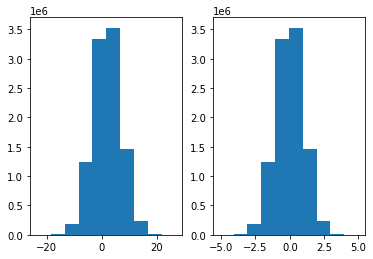

In [2]:
# synthetic data
x = np.random.normal(2,5,10000000)
print(f"x: mean = {x.mean()}, std = {x.std()}")
      
scaler = StandardScaler()
scaler.fit(x.reshape(-1,1))
x_rescaled = scaler.transform(x.reshape(-1,1))

print(f"x rescaled: mean = {x_rescaled.mean()}, std = {x_rescaled.std()}")

plt.subplot(1,2,1)
plt.hist(x)
plt.subplot(1,2,2)
plt.hist(x_rescaled)
plt.show()

In [3]:
x_alt = np.random.normal(2,5,10000000)
x_alt_scaled = scaler.transform(x_alt.reshape(-1,1))

print(f"x_alt: mean = {x_alt_scaled.mean()}, std = {x_alt_scaled.std()}")

x_alt: mean = 0.00025965460245796443, std = 0.9993966935829867


In [4]:
calc_result = x_alt - scaler.mean_
calc_result /= scaler.scale_

print(calc_result.mean())

assert calc_result.mean() == x_alt_scaled.mean()

0.00025965460245796443


In [5]:
x_ft = scaler.fit_transform(x.reshape(-1,1))
print(f"x_alt: mean = {x_ft.mean()}, std = {x_ft.std()}")

x_alt: mean = 3.2251392667603796e-16, std = 0.9999999999999992


In [6]:
import pandas as pd
df = pd.read_csv("data/insurance.csv")
#df = df.select_dtypes(include=['int64', 'float64'])
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [7]:
from sklearn.linear_model import LinearRegression

X = np.array(df.bmi).reshape(-1,1)
y = np.array(df.charges).reshape(-1,1)

linreg = LinearRegression(fit_intercept=True)
linreg.fit(X,y)

print(f"intercept: {linreg.intercept_}, coefficient: {linreg.coef_}")

intercept: [1192.93720896], coefficient: [[393.8730308]]


In [8]:
print(f"intercept: {linreg.intercept_[0]}, coefficient: {linreg.coef_[0][0]}")

intercept: 1192.9372089611497, coefficient: 393.87303079739524


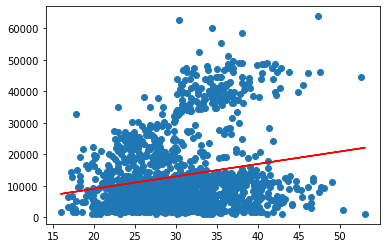

In [9]:
y_pred = linreg.predict(X)

plt.scatter(X, y)
plt.plot(X,y_pred, color='red')
plt.show()

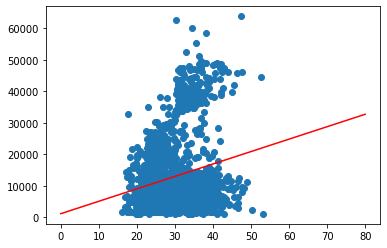

In [10]:
x_plot = np.linspace(0,80).reshape(-1,1)
y_extrapol = linreg.predict(x_plot)

plt.scatter(X, y)
plt.plot(x_plot,y_extrapol, color='red')
plt.show()

In [11]:
from sklearn.metrics import r2_score

r2_slr = r2_score(y, y_pred)
print(r2_slr)

0.03933913991786264


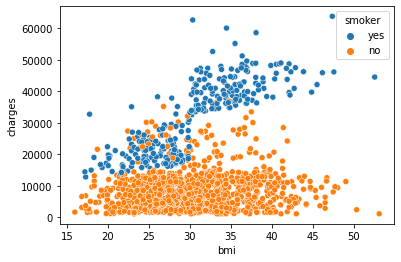

In [12]:
import seaborn as sns

sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker)
plt.show()

In [13]:
X_smoker = np.array(df[df.smoker =='yes']['bmi']).reshape(-1,1)
y_smoker = np.array(df[df.smoker =='yes']['charges']).reshape(-1,1)

X_non_smoker = np.array(df[df.smoker =='no']['bmi']).reshape(-1,1)
y_non_smoker = np.array(df[df.smoker =='no']['charges']).reshape(-1,1)

linreg_smoker = LinearRegression(fit_intercept=True)
linreg_smoker.fit(X_smoker,y_smoker)
                        
linreg_non_smoker = LinearRegression(fit_intercept=True)
linreg_non_smoker.fit(X_non_smoker,y_non_smoker)

print(f"smoker: \nintercept: {linreg_smoker.intercept_}, coefficient: {linreg_smoker.coef_}")
print(f"non-smoker: \nintercept: {linreg_non_smoker.intercept_}, coefficient: {linreg_non_smoker.coef_}")

smoker: 
intercept: [-13186.57632276], coefficient: [[1473.1062547]]
non-smoker: 
intercept: [5879.42408187], coefficient: [[83.35055766]]


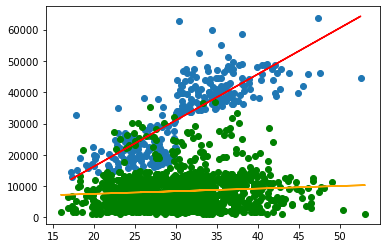

In [14]:
y_pred_sm = linreg_smoker.predict(X_smoker)
y_pred_non = linreg_non_smoker.predict(X_non_smoker)

plt.scatter(X_smoker, y_smoker,)
plt.plot(X_smoker,y_pred_sm, color='red')
plt.scatter(X_non_smoker, y_non_smoker, color='green')
plt.plot(X_non_smoker,y_pred_non, color='orange')
plt.show()

In [15]:
r2_slr_sm = r2_score(y_smoker, y_pred_sm)
r2_slr_non = r2_score(y_non_smoker, y_pred_non)
print(f"smokers: {r2_slr_sm}, \nnon-smokers: {r2_slr_non}")

smokers: 0.6504109694921547, 
non-smokers: 0.007062140580960441


In [16]:
import statsmodels.api as sm

X_smoker = sm.add_constant(X_smoker)
X_non_smoker = sm.add_constant(X_non_smoker)

stats_smoker = sm.OLS(y_smoker, X_smoker)
res_smoker = stats_smoker.fit()
print(res_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     506.1
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.02e-64
Time:                        09:15:35   Log-Likelihood:                -2807.2
No. Observations:                 274   AIC:                             5618.
Df Residuals:                     272   BIC:                             5626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.319e+04   2052.885     -6.423      0.0

In [17]:
stats_non_smoker = sm.OLS(y_non_smoker, X_non_smoker)
res_non_smoker = stats_non_smoker.fit()
print(np.round(res_non_smoker.pvalues,3))

[0.    0.006]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_rf = df[['age', 'bmi', 'children', 'charges']]
y_rf = df.smoker == 'yes'

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.4, random_state= 1)

rf = RandomForestClassifier(max_depth=4, random_state=44)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.9755105572862581


In [19]:
print(len(rf.estimators_))

100


In [20]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(1, 1, figsize=(8,5), dpi=500)
plot_tree(rf.estimators_[0],
          feature_names = X_rf.columns, 
          class_names=['smoker', 'non_smoker'],
          filled = True,
          label='root')
plt.show()